In [2]:
import csv
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt
import numpy as np

M = []
I = []

with open('rezultati.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        M.append(float(row[0]))
        I.append(float(row[2]))

In [15]:
print(M,I)

[1.0, 1.2, 1.4, 1.6, 1.8, 2.0] [1421.0, 1841.0, 2147.0, 2459.0, 2774.0, 3107.0]


In [37]:
def fit_func(x, a, b):
    return x*a+b

N = 3
Nh = 154
Rh = 0.2
Ih = 2.888
r = 0.1216/2

S = math.pi*r**2

mu0 = 4*math.pi*10**-7

x = [(4/5)**(3/2)*N*Nh*Ih*S/Rh *x/1000*mu0 for x in I]
y = M
print(x,y)

[9.899314511698038e-05, 0.00012825220278702386, 0.00014956951623234122, 0.0001713048162158021, 0.00019324910946833467, 0.00021644736233529773] [1.0, 1.2, 1.4, 1.6, 1.8, 2.0]


In [38]:
params = curve_fit(
    fit_func, x, y)
a = params[0][0]
b = params[0][1]

err = params[1][0][0]**(1/2)/a
print('naklon grafa: a =', a, ', b =', b, 'err=', err)

naklon grafa: a = 8684.944604687593 , b = 0.11356996284246611 err= 0.024908891799584568


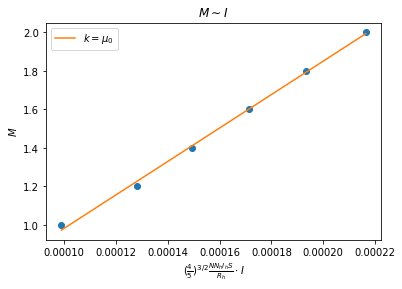

In [39]:
x_fit = np.linspace(x[0], x[-1], 100)

y_fit = fit_func(x_fit, a, b)

plt.plot(x, y, 'o')
plt.plot(x_fit, y_fit, label=r'$k = \mu_0$')

plt.title(r'$M \sim I$')
plt.ylabel(r'$M$')
plt.xlabel(r'$(\frac{4}{5})^{3/2} \frac{N N_h I_h S}{R_h}\cdot I$')

#plt.grid(True)

plt.legend()
plt.show()